In [1]:
from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp

0.9899945
0.48401058
0.24924958
0.21380872
0.21309917
0.20600006
0.19723898
0.19723898


In [2]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05 #0.05

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"

from dds.targets.toy_targets import get_attr
### SET TASK
task = "booth"
div, e, other_dim = get_attr()
div = str(div).replace(".", "")
e = str(e).replace(".", "")

save_name = f"{task}_s{div}_plus{e}_od{other_dim}"


funnel_config = set_task(funnel_config, task)
funnel_config.model.reference_process_key = "oudstl"

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 1.075
    funnel_config.model.alpha = 0.6875
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = False


funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 11000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 5 * 10**(-3)
funnel_config.trainer.lr_sch_base_dec = 0.95 # For funnel

In [3]:
funnel_config.model.reference_process_key 

'oudstl'

In [4]:
input_dim = funnel_config.model.input_dim

In [5]:
funnel_config.model.step_scheme_key

'cos_sq'

In [6]:
funnel_config.model.ts.shape

(128,)

In [7]:
funnel_config.trainer.epochs = 100 #2000# 1000
out_dict = train_dds(funnel_config)

('epoch: %s %s  loss: %s', 0, 'TRAIN', 45314.87109375)
('epoch: %s %s  loss: %s', 1, 'TRAIN', 37908.05078125)
('epoch: %s %s  loss: %s', 2, 'TRAIN', 31202.9296875)
('epoch: %s %s  loss: %s', 3, 'TRAIN', 26726.7734375)
('epoch: %s %s  loss: %s', 4, 'TRAIN', 19703.5)
('epoch: %s %s  loss: %s', 5, 'TRAIN', 16683.87109375)
('epoch: %s %s  loss: %s', 6, 'TRAIN', 13311.71875)
('epoch: %s %s  loss: %s', 7, 'TRAIN', 9723.734375)
('epoch: %s %s  loss: %s', 8, 'TRAIN', 6739.6162109375)
('epoch: %s %s  loss: %s', 9, 'TRAIN', 5262.84130859375)
('epoch: %s %s  loss: %s', 10, 'TRAIN', 3905.974365234375)
('epoch: %s %s  loss: %s', 11, 'TRAIN', 3179.335205078125)
('epoch: %s %s  loss: %s', 12, 'TRAIN', 2732.445068359375)
('epoch: %s %s  loss: %s', 13, 'TRAIN', 2024.7353515625)
('epoch: %s %s  loss: %s', 14, 'TRAIN', 1616.5101318359375)
('epoch: %s %s  loss: %s', 15, 'TRAIN', 1282.3143310546875)
('epoch: %s %s  loss: %s', 16, 'TRAIN', 1086.1834716796875)
('epoch: %s %s  loss: %s', 17, 'TRAIN', 1007.214

In [8]:
out_dict[-1].keys()

dict_keys(['elbo', 'is', 'pf', 'elbo_eval', 'is_eval', 'pf_eval', 'aug', 'aug_ode', 'aug_ode_ext'])

In [9]:
onp.mean(out_dict[-1]["is_eval"])

13.647972551981608

In [10]:
onp.mean(out_dict[-1]["pf_eval"])

-5.278216870625814

In [11]:
out_dict[-1]["pf_eval"]

[-11.763469696044922,
 -4.32236385345459,
 -4.320717811584473,
 -4.473145484924316,
 -3.5869531631469727,
 -4.558481216430664,
 -5.401607513427734,
 -3.626957893371582,
 -4.202422142028809,
 -5.288447380065918,
 -3.590669631958008,
 -6.767187118530273,
 -9.251502990722656,
 -6.865220069885254,
 -3.696870803833008,
 -3.1724987030029297,
 -5.112940788269043,
 -5.813871383666992,
 -5.077042579650879,
 -6.755775451660156,
 -5.83150577545166,
 -3.719191551208496,
 -5.243868827819824,
 -3.013181686401367,
 -4.989190101623535,
 -4.9765825271606445,
 -6.261992454528809,
 -5.4188337326049805,
 -4.8332109451293945,
 -6.410802841186523]

In [12]:
funnel_config.model.reference_process_key

'oudstl'

In [13]:
print(out_dict[-1]["aug"].shape)

(10000, 129, 6)


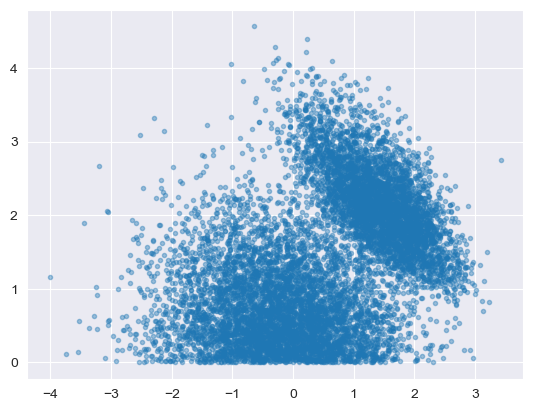

In [14]:
import matplotlib.pyplot as plt

#ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

#plt.plot(ode_targ[:, 0], abs(ode_targ[:, 1]), ".", alpha=0.4)
plt.plot(sde_targ[:, 0], abs(sde_targ[:, 1]), ".", alpha=0.4)
#print(onp.mean(sde_targ[:, 0]))

In [15]:
import numpy as np
data_x = []
data_fx = []
for sample in out_dict[-1]["aug"]:
    x = sample[-1][:input_dim-1]
    fx = abs(sample[-1][input_dim-1])
    data_x.append(x)
    data_fx.append(fx)

m = np.argmax(data_fx)
print(f"weights: {data_x[m]}")


# Create a list of tuples containing x, y, and z values
combined_data = zip(data_x, data_fx)

# Sort the combined data based on the z values in descending order
sorted_data = sorted(combined_data, key=lambda t: t[1], reverse=True)

# Unzip the sorted data back into separate x, y, and z lists
data_x_sorted, data_fx_sorted = zip(*sorted_data)

best = np.array(list(zip(data_x_sorted, data_fx_sorted)))[:100]
# avg = np.mean(best, axis=0)
# v, w = avg
# print(np.sin(3*np.pi*v) + (v - 1)**2 * (1+np.sin(3*np.pi*w)**2) + (w-1)**2 * (1 + np.sin(2*np.pi*w)**2))
# print(avg)
#print(best)
# for v,w in best:
#     v = np.sin(3*np.pi*v) + (v - 1)**2 * (1+np.sin(3*np.pi*w)**2) + (w-1)**2 * (1 + np.sin(2*np.pi*w)**2)
#     print(v)
from experimental.breastcancer_t import breast_task
task = breast_task()
b = 1
w = None
print(len(data_x))
#for weights in data_x:
for weights, _ in best:
    l = task.get_loss(weights)
    #print(l)
    if l < b:
        b = l
        w = weights

print(b, w)

weights: [1.2700299 2.956746 ]


/var/folders/hj/s1tsphl91cz5pf6ngrvwd75w0000gn/T/ipykernel_41996/861454740.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  best = np.array(list(zip(data_x_sorted, data_fx_sorted)))[:100]


10000


InconclusiveDimensionOperation: Cannot divide evenly the sizes of shapes (2,) and (15, 4)

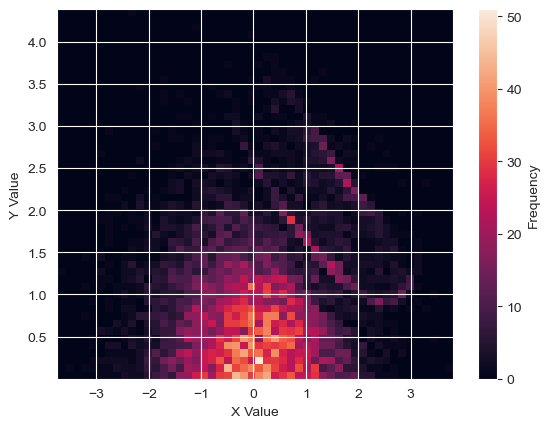

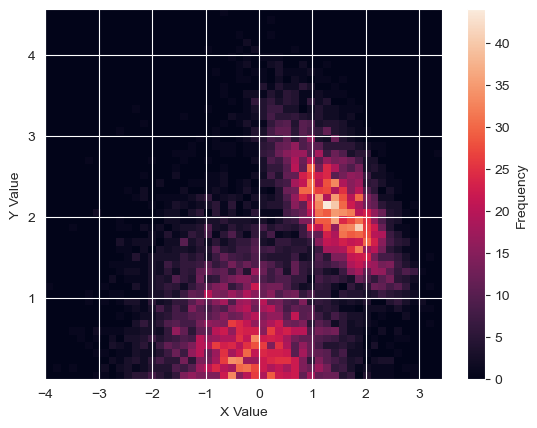

In [16]:
from visualisation import *

heat_2d(out_dict, save_name=save_name, sde=False)
heat_2d(out_dict, save_name=save_name, sde=True)


In [ ]:
from visualisation import *

heat_2d(out_dict, save_name=save_name, sde=False)
hist_3d(out_dict, save_name=save_name, sde=False)
plot_3d(out_dict, save_name=save_name, sde=False)
plot_2d(out_dict, save_name=save_name, sde=False)


heat_2d(out_dict, save_name=save_name, sde=True)
hist_3d(out_dict, save_name=save_name, sde=True)
plot_3d(out_dict, save_name=save_name, sde=True)
plot_2d(out_dict, save_name=save_name, sde=True)



In [ ]:
data = []
for sample in out_dict[-1]["aug"]:
    s = sample[-1][0]
    data.append(s)

# generate some sample data
#data = np.random.randn(1000)
# create the histogram
plt.hist(data, bins=50)

# set the x and y axis labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# show the plot
plt.show()

In [ ]:
data_x = []
data_y = []
for sample in out_dict[-1]["aug"]:
    x = sample[-1][0]
    y = abs(sample[-1][1]) # change when 3d
    data_x.append(x)
    data_y.append(y)

# Compute the 2D histogram values
counts, xedges, yedges, _ = plt.hist2d(data_x, data_y, bins=50)
max_count_index = np.unravel_index(np.argmax(counts), counts.shape)

hottest_x = (xedges[max_count_index[0]] + xedges[max_count_index[0] + 1]) / 2
hottest_y = (yedges[max_count_index[1]] + yedges[max_count_index[1] + 1]) / 2

# Print the coordinates of the hottest area
print(f"Hottest area coordinates: ({hottest_x}, {hottest_y})")
# show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = []
for sample in out_dict[-1]["aug"]:
    s = sample[-1][0]
    data.append(s)

# Compute the histogram values
hist, bin_edges = np.histogram(data, bins=50)

# Compute the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create a line plot using Seaborn
sns.lineplot(x=bin_centers, y=hist)

# Set the x and y axis labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
data_x = []
data_y = []
data_z = []
for sample in out_dict[-1]["aug"]:
    x = sample[-1][0]
    y = sample[-1][1]
    z = abs(sample[-1][2])
    data_x.append(x)
    data_y.append(y)
    data_z.append(z)

m = np.argmax(data_z)
print(f"x: {data_x[m]}, y: {data_y[m]}")


# Create a list of tuples containing x, y, and z values
combined_data = zip(data_x, data_y, data_z)

# Sort the combined data based on the z values in descending order
sorted_data = sorted(combined_data, key=lambda t: t[2], reverse=True)

# Unzip the sorted data back into separate x, y, and z lists
data_x_sorted, data_y_sorted, data_z_sorted = zip(*sorted_data)

best = np.array(list(zip(data_x_sorted, data_y_sorted)))[:30]
avg = np.mean(best, axis=0)
v, w = avg
print(np.sin(3*np.pi*v) + (v - 1)**2 * (1+np.sin(3*np.pi*w)**2) + (w-1)**2 * (1 + np.sin(2*np.pi*w)**2))
print(avg)
print(best)
for v,w in best:
    v = np.sin(3*np.pi*v) + (v - 1)**2 * (1+np.sin(3*np.pi*w)**2) + (w-1)**2 * (1 + np.sin(2*np.pi*w)**2)
    print(v)

In [ ]:
import matplotlib.pyplot as plt

timestep = 40

ode_targ = out_dict[-1]["aug_ode"][:, timestep,:2]
#sde_targ = out_dict[-1]["aug"][:, timestep,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
#plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)

In [ ]:
cake = funnel_config.trainer.lnz_pf_estimator(
    out_dict[-1]["aug_ode"], funnel_config.model.source, funnel_config.model.target, debug=False)

In [ ]:
cake

In [ ]:
funnel_config.model.target(out_dict[-1]["aug_ode"][:, -1,:10]).mean()

In [ ]:
funnel_config.model.source(out_dict[-1]["aug_ode"][:, 0,:10]).mean()

In [ ]:
import distrax
import numpy as np

equi_normal2 = distrax.MultivariateNormalDiag( np.zeros(10) , funnel_config.model.sigma * np.ones(10))

equi_normal2.log_prob(out_dict[-1]["aug_ode"][:, 0,:10]).mean()

In [ ]:
funnel_config